# Cats vs Dogs images classification in Deep Learning using Convolutional neural network (CNN) with TensorFlow - Keras




# Introduction

This dataset is slightly different from the dataset used in the PyTorch notebook.

I am not using Kaggle this time. However, the dataset is almost the same but from a different source. 

I am not using it for the Kaggle competition, but if you want to test this code, you just have to switch to the PyTorch code and make some modifications.

# GPU setting if you use Google Colab

You have to check if the GPU is availabe to run faster your CNN when you do the training.

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("A GPU compatible with CUDA is available")
else:
    device = torch.device("cpu")
    print("No CUDA-compatible GPU is available.")


If it's available, you have to do this :

Edit => Notebook settings or Runtime => Change runtime type and select GPU as Hardware accelerator.

# Removing files

In [ ]:
!rm -r PetImages
!rm readme[1].txt
!rm /content/CDLA-Permissive-2.0.pdf
!rm /content/kagglecatsanddogs_5340.zip

rm: cannot remove 'PetImages': No such file or directory
rm: cannot remove 'readme[1].txt': No such file or directory
rm: cannot remove '/content/CDLA-Permissive-2.0.pdf': No such file or directory
rm: cannot remove '/content/kagglecatsanddogs_5340.zip': No such file or directory


# Dataset Information

The dataset comprises 25,000 images of both dogs and cats, which will be used to train our algorithm and make predictions on their respective labels.

We also consider that :

- 1 = Dog 
- 0 : Cat

# Download Dataset

It is possible to obtain the dataset by directly downloading it from the Microsoft website.

If the URL doesn't work, download from my GitHub.

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-04-29 21:25:02--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.123.44.196, 2a02:26f0:c900:289::317f, 2a02:26f0:c900:284::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.123.44.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   171MB/s    in 5.1s    

2023-04-29 21:25:07 (153 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



# Unzip the Dataset

In [ ]:
!unzip kagglecatsanddogs_5340.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflatin

# Import libraries

In [ ]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Interacting with the operating system
import os

# Displaying progress bars
import tqdm

# Generating random numbers
import random        

# Import PIL for image processing tasks
import PIL

# Split the train and test set
from sklearn.model_selection import train_test_split

# Loading image files as numpy arrays and Create data generator for the images 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

# Model creation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create Dataframe for Input and Output

To make processing easier, it is recommended to create a dataframe that can convert input and output paths for the Dogs vs Cats dataset. 

This is particularly important because the dataset structure and label names may vary depending on where it was downloaded from. 

By using a dataframe, you can easily map the paths and labels to a standardized format that can be processed by your code.

In [ ]:
# Create empty lists for input_path and label
input_path = []
label = []

# Iterate over the contents of the PetImages folder
for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        # Append file path to input_path list
        input_path.append(os.path.join("PetImages", class_name, path))
        # Append label to label list
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)

# Print the first element of input_path and label lists
print("The path to the first image file in the dataset is:", input_path[0])
print("The corresponding label for the first image is:", label[0])

The path to the first image file in the dataset is: PetImages/Cat/9315.jpg
The corresponding label for the first image is: 0


We can now create a pandas dataframe to process the input and output paths that we have generated.

In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Cat/9836.jpg      0
1   PetImages/Dog/5397.jpg      1
2  PetImages/Dog/10196.jpg      1
3  PetImages/Cat/11846.jpg      0
4   PetImages/Dog/5694.jpg      1

In [ ]:
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)

l

['PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Cat/Thumbs.db']

In [ ]:
# Delete db files

df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

# Exploratory Data Analysis

We will display a grid of images to visualize the contents of the dataset.

In [ ]:
df['label'].value_counts()

0    12499
1    12499
Name: label, dtype: int64

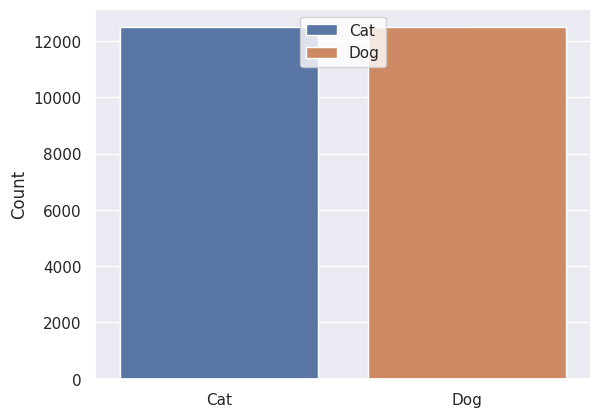

In [ ]:
sns.countplot(data=df, x='label', hue='label')
sns.set_style("whitegrid")
ax = sns.countplot(x="label", data=df)

ax.set_xticklabels(["Cat", "Dog"])
ax.set_xlabel("")
ax.set_ylabel("Count")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Cat", "Dog"], loc="upper center")
plt.show()

We can see an equal distribution of both classes which is good.

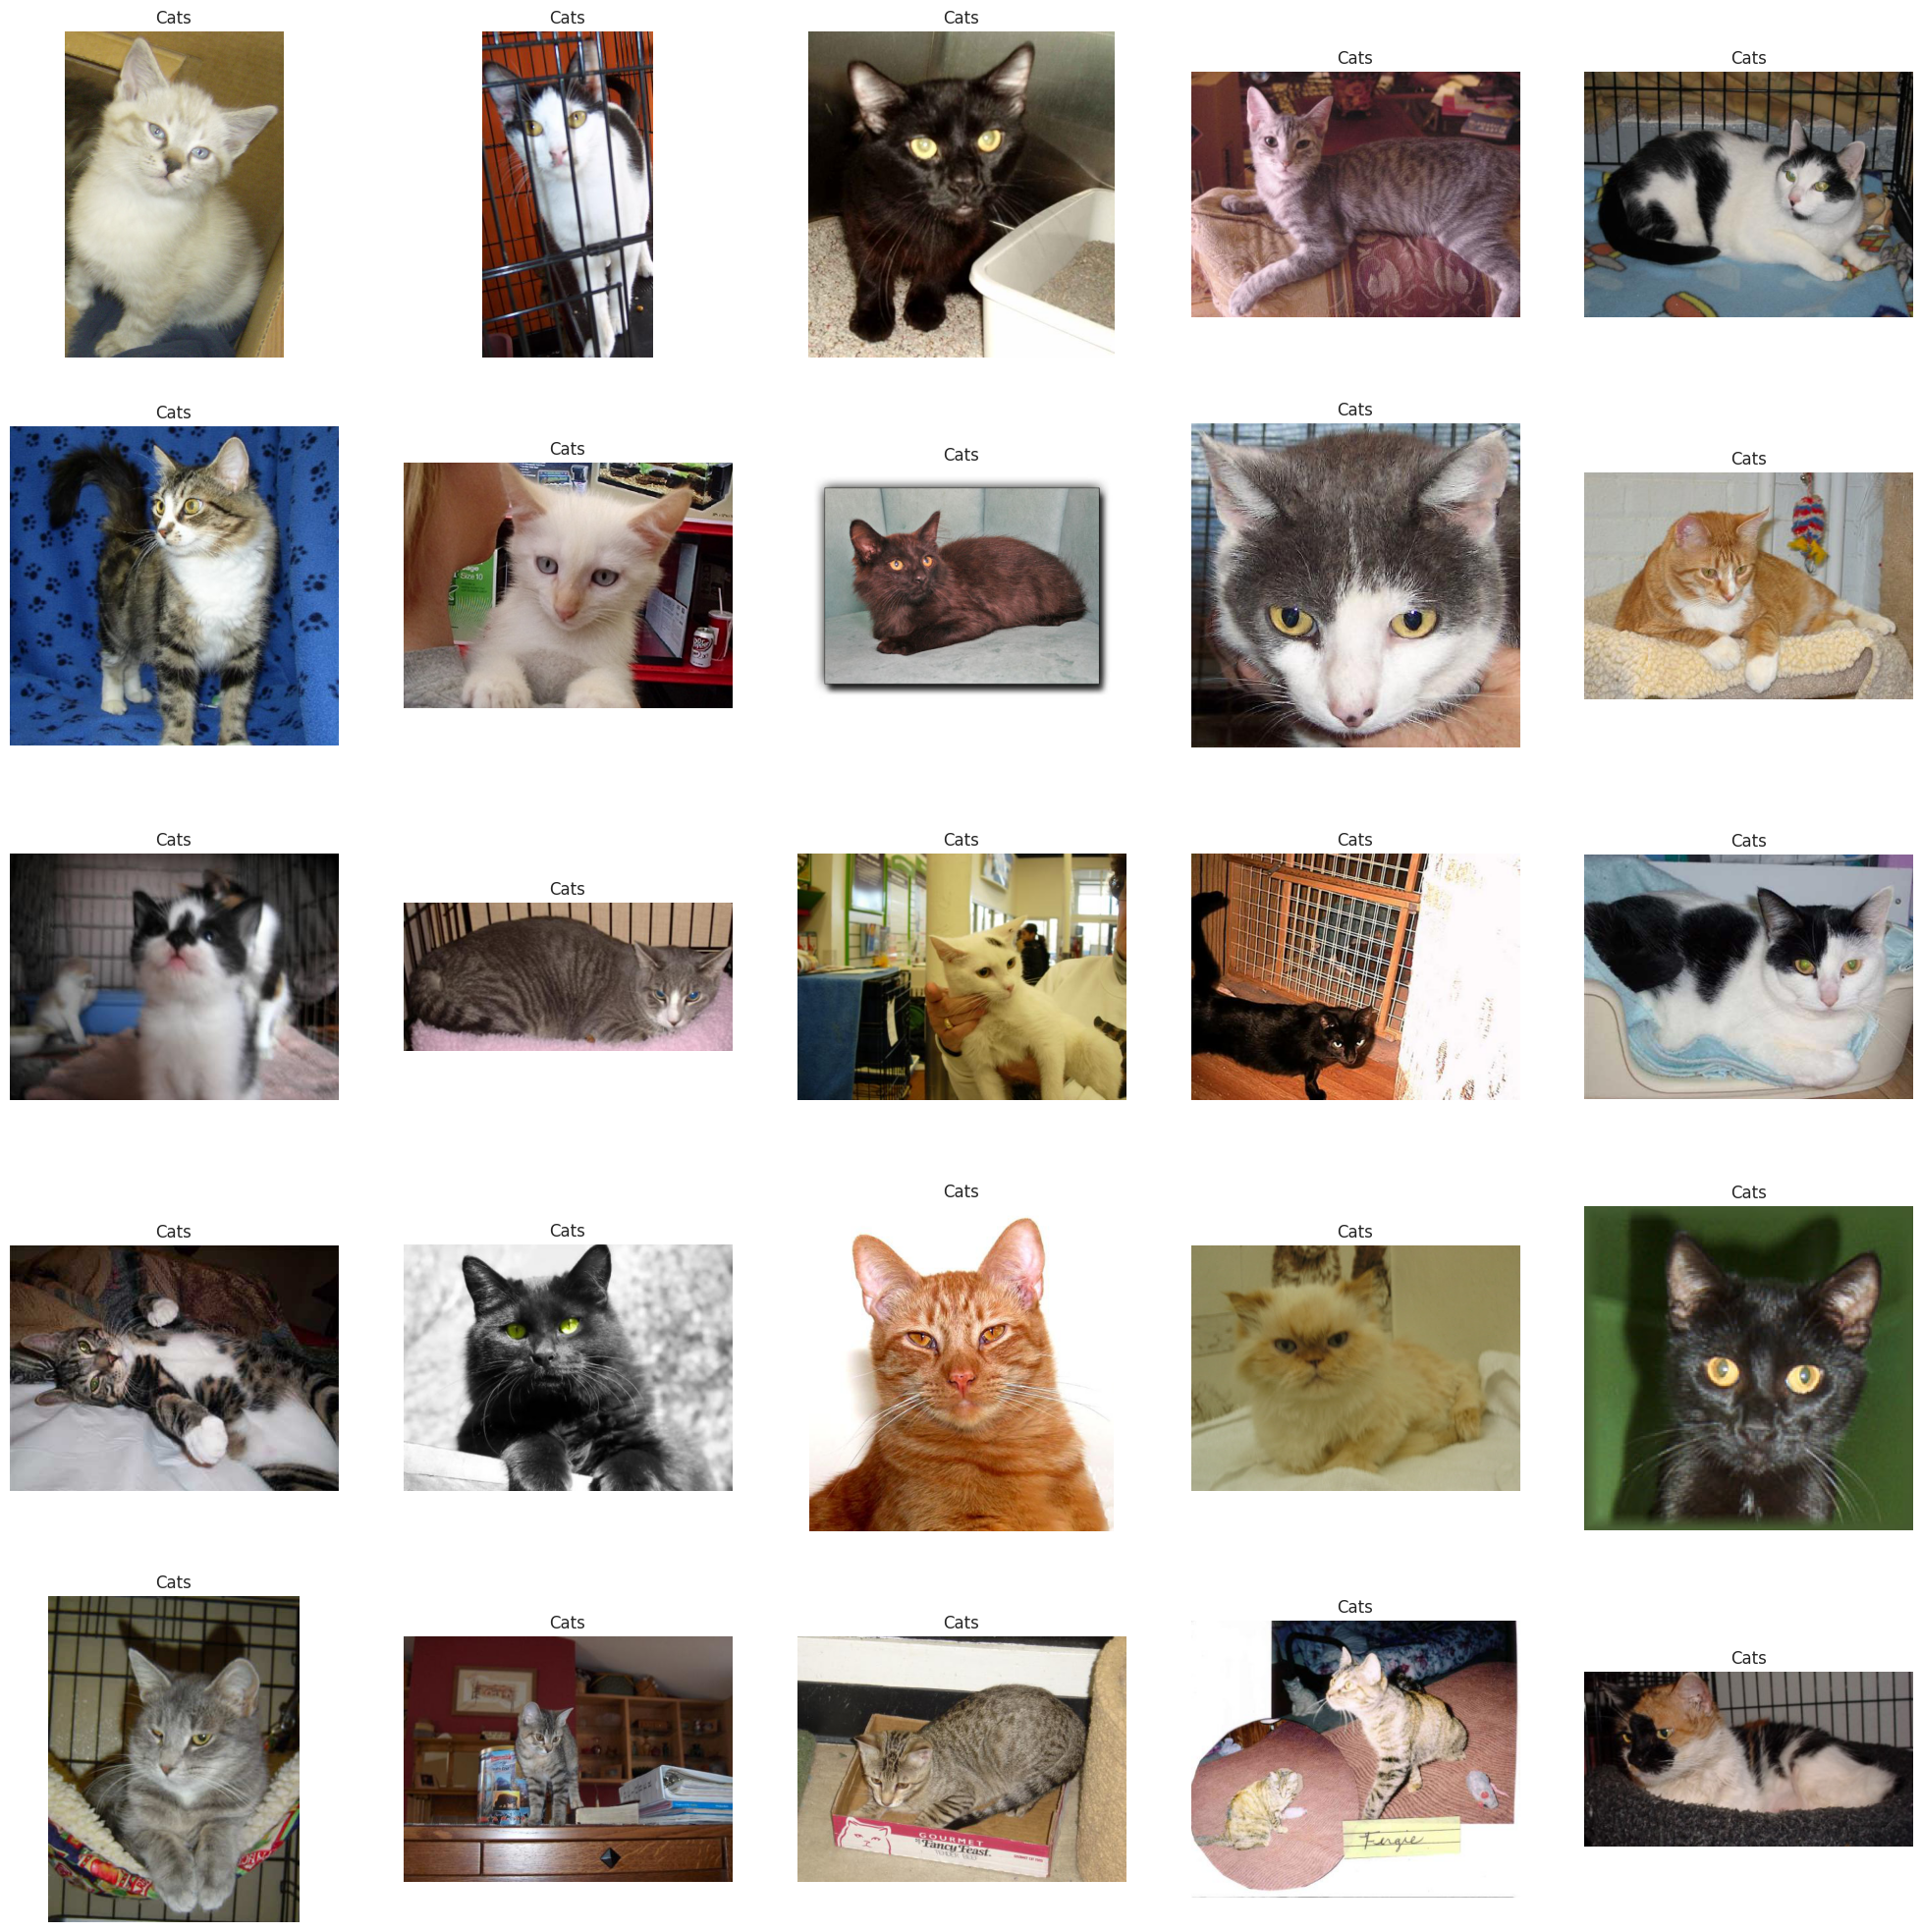

In [ ]:
# Displaying a grid of cat images

plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = tf.keras.preprocessing.image.load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cat')
    plt.axis('off')

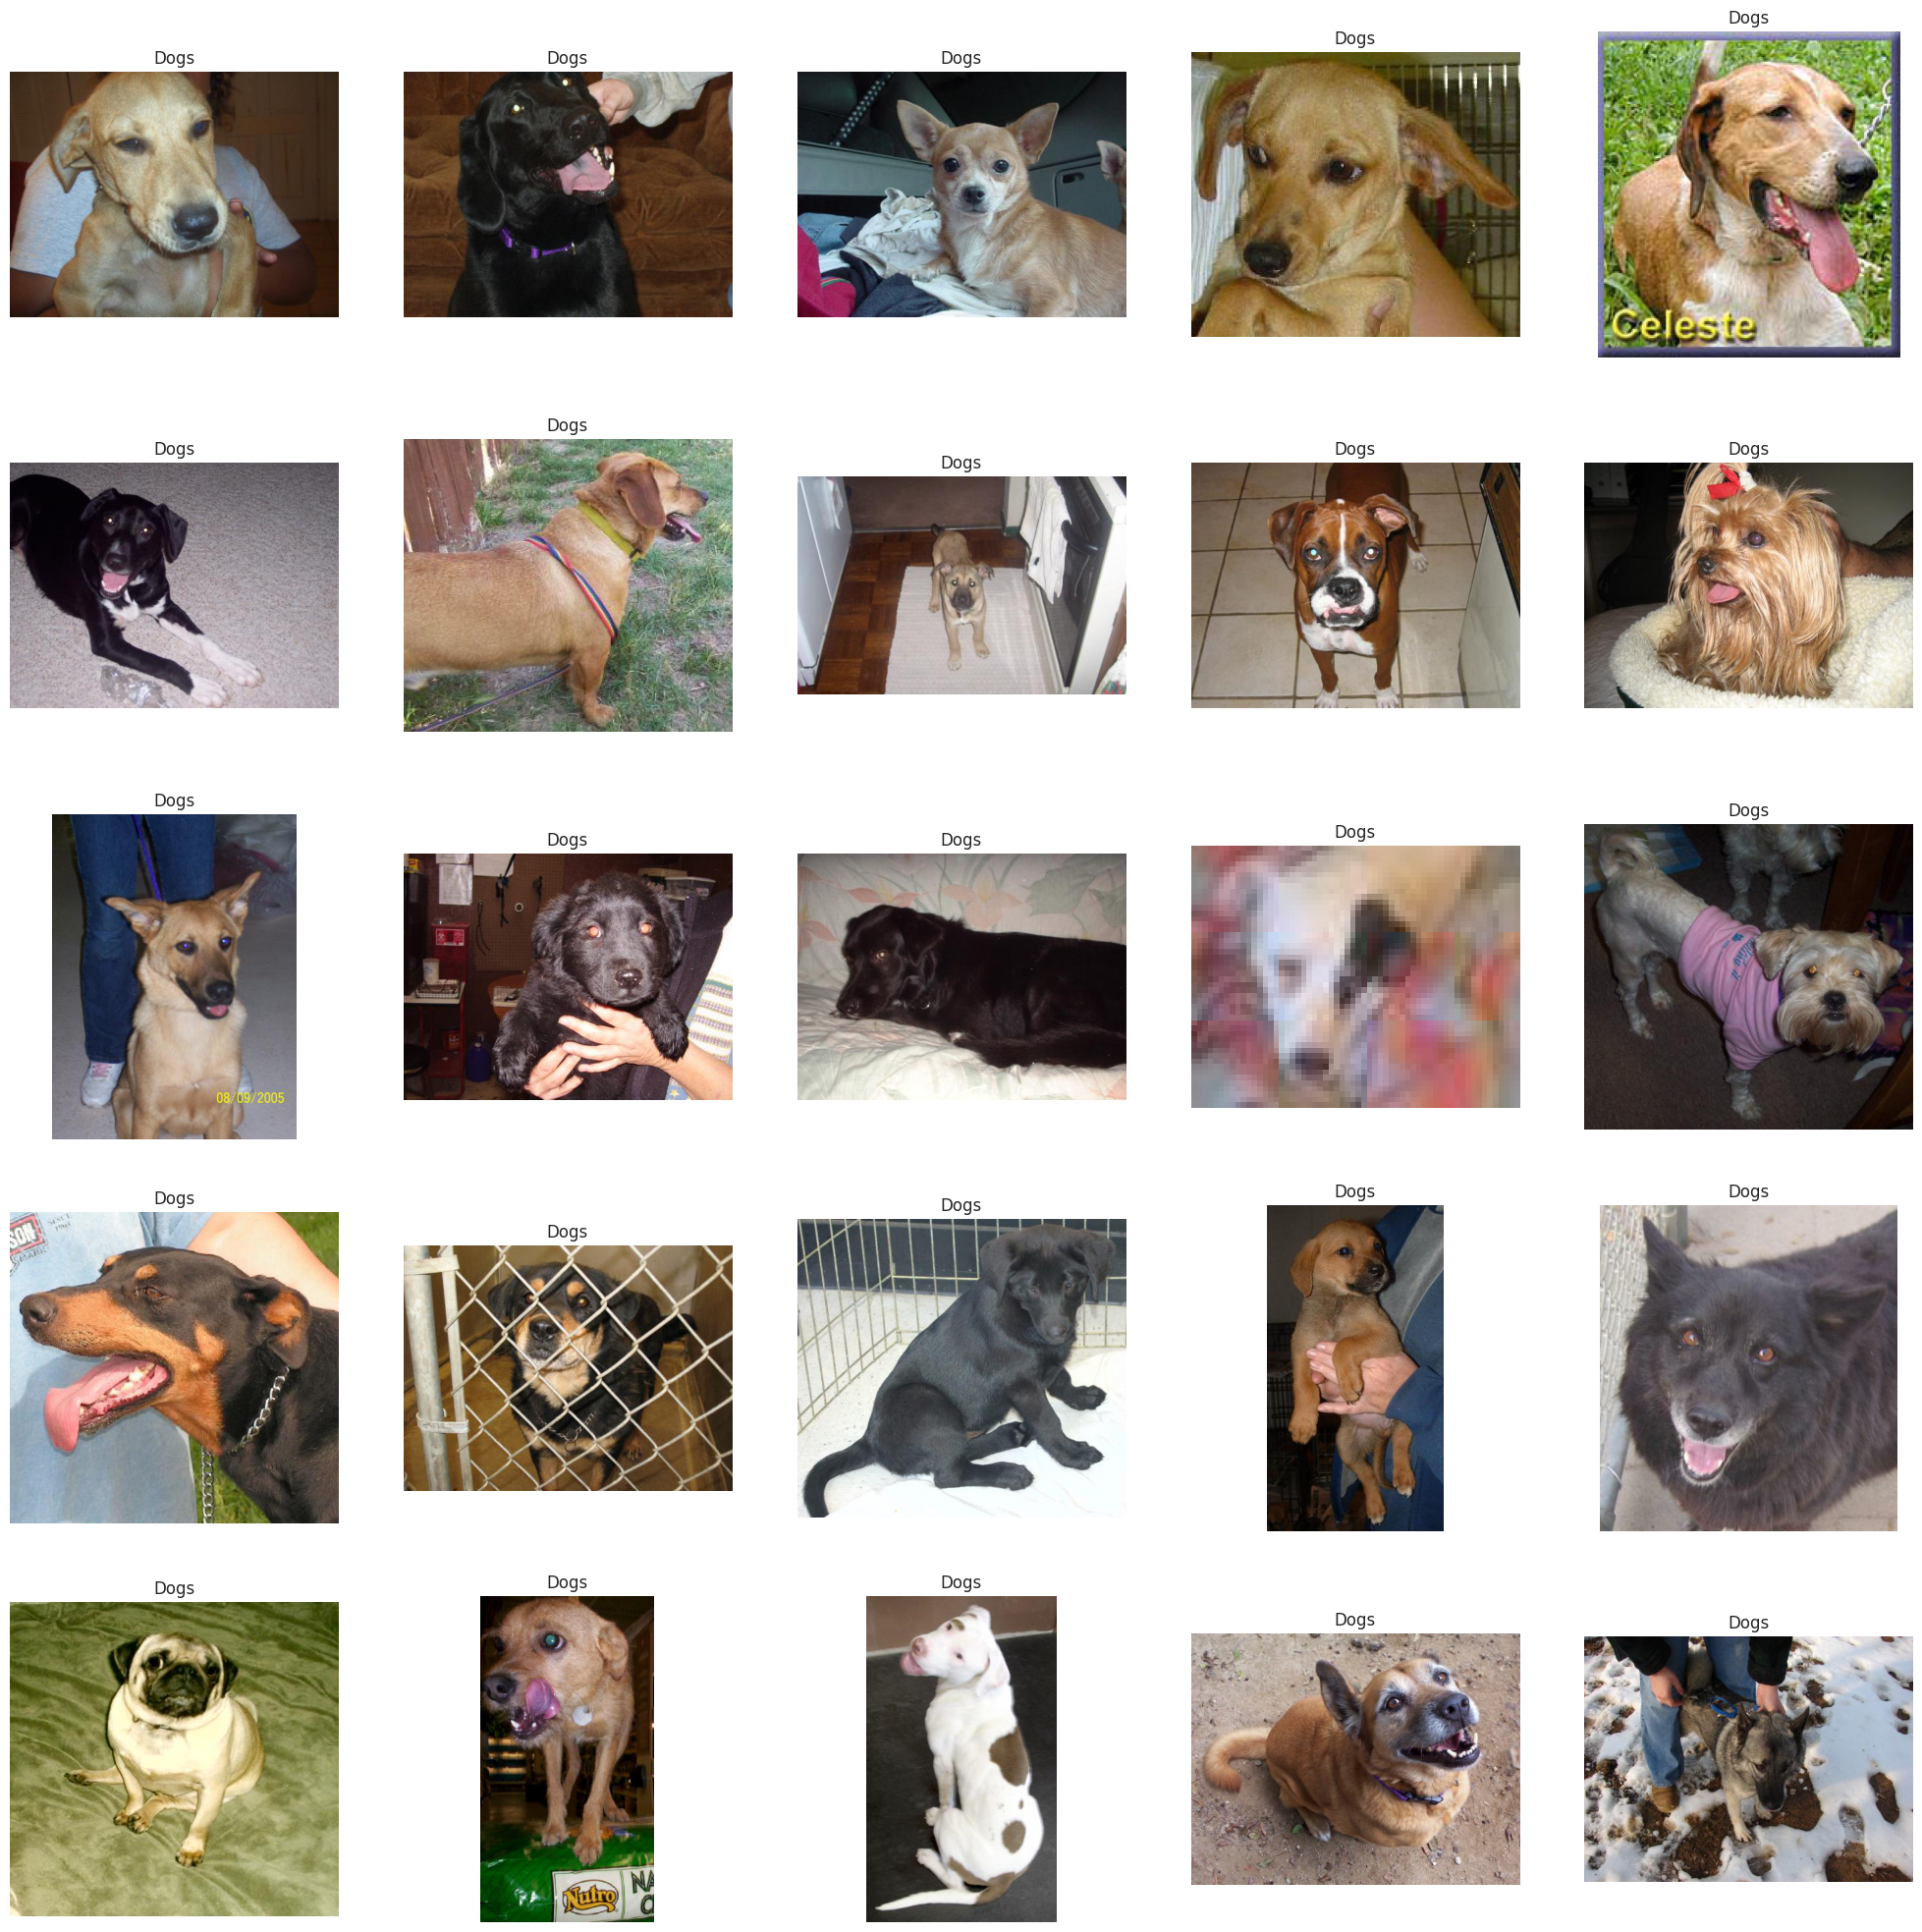

In [ ]:
# Display grid of dog images

plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = tf.keras.preprocessing.image.load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dog')
    plt.axis('off')

# Create Data Generator for the images

Data generators are used to load data directly from the disk during training, thus saving RAM space and preventing potential system crashes caused by memory overflow.

In [ ]:
df['label'] = df['label'].astype('str')
df.head()

images label
0   PetImages/Cat/9836.jpg     0
1   PetImages/Dog/5397.jpg     1
2  PetImages/Dog/10196.jpg     1
3  PetImages/Cat/11846.jpg     0
4   PetImages/Dog/5694.jpg     1

Let split the input data

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_iterator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


The images were transformed using augmentation to create variations in angle and improve the model's performance.

- batch size of 512 : This refers to the number of images that will be processed in each iteration of training. A larger batch size means that more images are processed at once, which can speed up training time but requires more memory.

- The batch size should be chosen based on the available hardware resources (e.g. GPU memory) to ensure efficient use of the hardware and avoid out-of-memory errors.

- class_mode='binary' : This parameter is used to specify the type of classification problem. In this case, 'binary' indicates that there are only two classes (e.g. cats and dogs), as opposed to a multi-class classification problem where there are more than two classes.

# Create our CNN

In [ ]:
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

- Dense : A linear layer with a single dimension array

- Conv2D : A convolutional layer in 2 dimensions

- MaxPooling2D : A function to obtain the maximum pixel value for the next layer.

- Flatten : A layer to convert a 2D array into a 1D array.
Dropout should be used if data augmentation is not applied to the images to avoid overfitting.

- activation='relu' : Activation functions which correspond to Rectified Linear Unit (ReLU ). It is commonly used for image classification models.

- input_shape=(128, 128, 3) : Indicates the resolution size of the images in RGB color scale. If the images are in grayscale, the third parameter is set to 1.

- activation='sigmoid' Activation functions which correspond to a sigmoid. It is used for binary classification.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

- model.compile() : Compilation of the model

- optimizer='adam': An optimizer that automatically adjusts the learning rate for the model over the number of epochs.

- loss='binary_crossentropy': A loss function used for binary outputs.

# Training our model

Depending on your GPU hardware, the execution time may be long.

In [ ]:
history = model.fit(train_iterator, epochs=15, validation_data=val_iterator) # 10 epochs by default 

Epoch 1/15
40/40 [==============================] - 177s 4s/step - loss: 0.7587 - accuracy: 0.5460 - val_loss: 0.6667 - val_accuracy: 0.5874
Epoch 2/15
40/40 [==============================] - 163s 4s/step - loss: 0.6542 - accuracy: 0.6118 - val_loss: 0.6438 - val_accuracy: 0.6202
Epoch 3/15
40/40 [==============================] - 163s 4s/step - loss: 0.6169 - accuracy: 0.6582 - val_loss: 0.5968 - val_accuracy: 0.6766
Epoch 4/15
40/40 [==============================] - 161s 4s/step - loss: 0.5861 - accuracy: 0.6890 - val_loss: 0.5718 - val_accuracy: 0.7004
Epoch 5/15
40/40 [==============================] - 160s 4s/step - loss: 0.5708 - accuracy: 0.6995 - val_loss: 0.5219 - val_accuracy: 0.7418
Epoch 6/15
40/40 [==============================] - 160s 4s/step - loss: 0.5343 - accuracy: 0.7309 - val_loss: 0.5072 - val_accuracy: 0.7638
Epoch 7/15
40/40 [==============================] - 158s 4s/step - loss: 0.5223 - accuracy: 0.7396 - val_loss: 0.5182 - val_accuracy: 0.7462
Epoch 8/15
40

# Visualization of our results

Analyzing both measurements, accuracy and loss, can provide more information on how our model is performing:

- A low accuracy but high loss indicates that the model makes significant errors in most of the data.

- A low accuracy and low loss indicate that the model makes minor errors in most of the data.

- High accuracy and high loss imply that the model makes significant errors in some of the data.

- High accuracy and low loss indicate that the model makes minor errors in just some of the data, which is the ideal case.

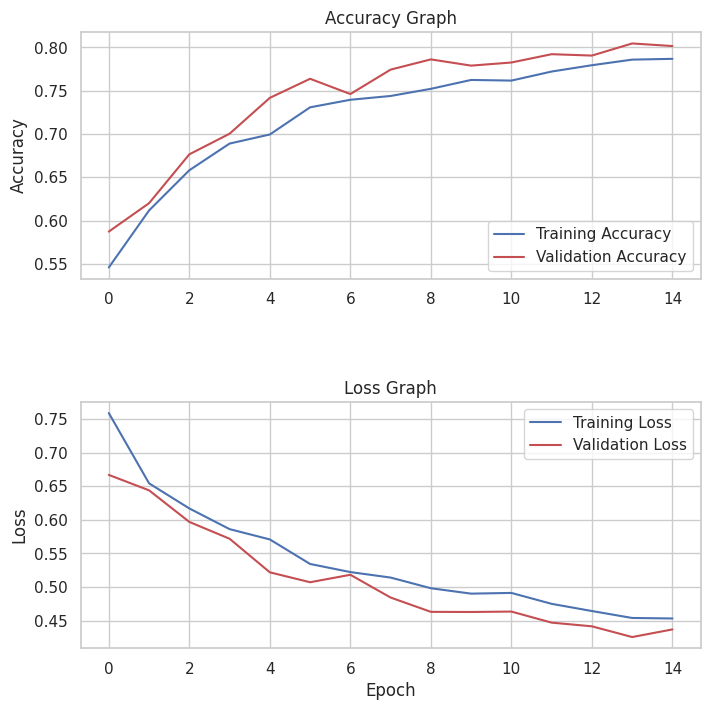

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
fig.subplots_adjust(hspace=0.5)

# Plot Accuracy Graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

ax1.plot(epochs, acc, 'b', label='Training Accuracy')
ax1.plot(epochs, val_acc, 'r', label='Validation Accuracy')
ax1.set_title('Accuracy Graph')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot Loss Graph
loss = history.history['loss']
val_loss = history.history['val_loss']

ax2.plot(epochs, loss, 'b', label='Training Loss')
ax2.plot(epochs, val_loss, 'r', label='Validation Loss')
ax2.set_title('Loss Graph')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

# Test with a real image

In [ ]:
image_path = "cat.jpg" # Path of the image
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 # Stanrardization/Normalization of images
img = img.reshape(1, 128, 128, 3) # Do a reshape for prediction
pred = model.predict(img)
print("Prediction of the image :", pred[0])
if pred[0] > 0.5: # You can adjust depending on pred[0]
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 [==============================] - 0s 197ms/step
Prediction of the image : [0.4505057]
Cat


Perform the same preprocessing step as before and use the model to predict the probability. 

My image do not predict well with 10 epochs (The cat picture is label as a dog dog sometime). The epoch needs to be increse if you want to  have a better prediction. However, it could take too much time to run depending on your GPU Hardware. 

If the probability is greater than 0.5, the image will be classified as 'Dog', and if the probability is less than 0.5, the image will be classified as 'Cat'. 

You can experiment with different probability thresholds to assess the performance of the model.